# Prática 02 - Métodos de visualização gráfica em Python usando Matplotlib e Plotly

Inicialmente, não se esqueça de ativar o ambiente que contém as bibliotecas e o Jupyter:

`aluno@dti:~$ conda info --env`

Ao listar os ambientes, selecione o ambiente apropriado **probS**:

````bash
aluno@dti:~$ source activate probS
(probS) aluno@dti:~$ conda info --envs
````

Veja que o ambiente **probS** foi ativado.

## Recapitulando

Na aula anterior, trabalhamos com métodos numéricos de descrição de dados e a descrição gráfica utilizando histograma. Nesta aula falaremos de diversos outros métodos de descrição gráfica.

As bibliotecas a seguir podem ser instaladas, após a ativação do ambiente, utilizando o comando `pip install`, no terminal linux.

In [1]:
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import random
import pandas as pd

## Box Plot

BoxPlot é um gráfico útil para vizualizar informações de mediana, quartis e outliers, além da possibilidade de comparar amostras em termos de sua localização e dispersão estatística. Podemos construir BoxPlots utilizando a biblioteca [`matplotlib`](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py):

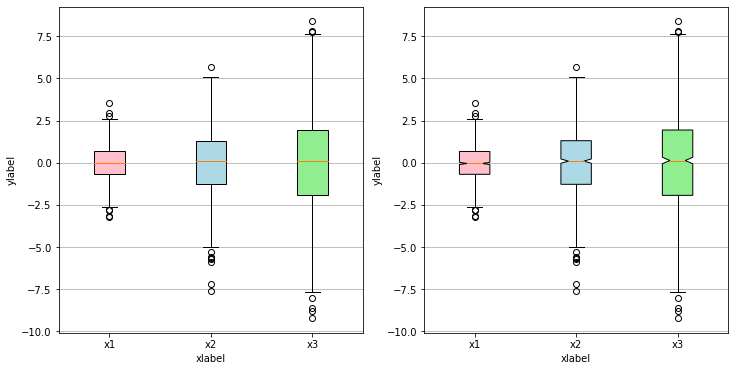

In [5]:
# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 1000) for std in range(1, 4)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3'])

plt.show()

Os dados para construção do boxPlot foram gerados aleatoriamente. Observe a diferença entre os dados. Agora, iremos exibir o boxPlot relativo aos dados da [Questão 01/ Lista 01](https://marcielbp.github.io/Statistics-and-Probability/listas/lista-01-est-descritiva/) em um boxPlot

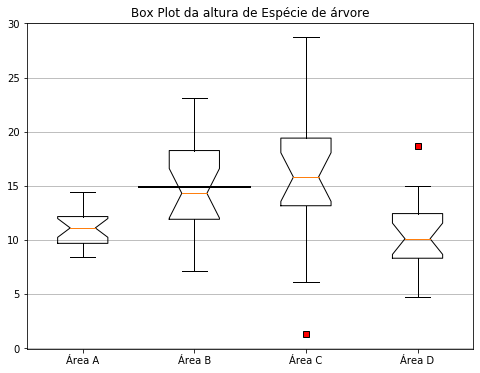

In [43]:
data = [[9.2,10.8,10.6,11.1,12.1,9.6,11.2,8.4,12.9,12.1,14.4,11.1,11.1,9.7,8.4,12.3,10.7,12.9,9.1,12.8],
[12.5,18.5,21.3,14.3,18.5,19.0,10.8,23.1,17.4,10.7,14.3,16.3,18.0,7.1,12.8,14.7,11.3,8.2,13.8],
[21.3,28.7,15.8,24.0,13.7,18.1,12.6,14.6,6.1,19.8,22.3,15.7,16.3,18.2,15.7,6.6,9.3,1.3,19.0],
[13.7,8.6,14.9,10.2,14.0,10.5,15.0,5.2,10.0,11.7,18.7,9.3,7.9,6.5,11.5,12.0,8.3,8.3,9.8,4.7]]
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
red_square = dict(markerfacecolor='r', marker='s')
ax.boxplot(data, [1,2,3,4],vert=True,flierprops=red_square)

ax.set_title('Box Plot da altura de Espécie de árvore', fontsize=12)
ax.yaxis.grid(True)
plt.setp(ax,xticklabels=['Área A', 'Área B', 'Área C', 'Área D'])
fig.subplots_adjust(hspace=0.4)
plt.show()

### Exercício

Um exame para uma faculdade tem 80 questões, sendo 40 de português e 40 de matemática. Para os 20
melhores classificados, apresentamos o número de acertos em cada disciplina.

> Português: 35, 35, 34, 32, 31, 30, 26, 26, 24, 23, 23, 12, 11, 20, 17, 12, 14, 20, 8, 10

> Matemática: 31, 29, 27, 28, 28, 26, 30, 28, 25, 23, 21, 32, 31, 20, 21, 25, 20, 13, 23, 20

Construa um gráfico de caixa (box plot) para cada grupo (em um mesmo gráfico para comparação). Na legenda deve constar o nome da disciplina. Indique também a posição da média amostral usando o recurso `plt.plot([x1,x2],[y1, y2], 'k-', lw=2)`. Como descobrir os valores apropriados de `[x1,x2],[y1, y2]`?

## BoxPlot interativo e espalhamento da amostra

A biblioteca [Plotly](https://plot.ly/python/reference/#box) permite a criação de gráficos interativos em HTML. A partir dela, vamos criar 

In [49]:
import plotly.graph_objects as go

In [54]:
fig = go.Figure()
names = ['Área A','Área B','Área C','Área D']
for i in range(0,4):
    fig.add_trace(go.Box(y=data[i],name=names[i]))
fig.show()

Podemos efetuar algumas mudanças no layout dos gráficos, a começar pela exibição dos pontos da amostra. Observe que a função `jitter` permite que a amostra seja exibida com um certo grau de aleatoriedade horizontal, cujo objetivo é apenas dar a ideia de variabilidade.

In [60]:
fig = go.Figure()
names = ['Área A','Área B','Área C','Área D']
colorNames = ['red','blue','orange','purple']
for i in range(0,4):
    fig.add_trace(go.Box(y=data[i],name=names[i],marker_color =colorNames[i]))
    fig.update_traces(boxpoints='all', jitter=0.1)
fig.update_layout(
    title='Box Plot da altura de Espécie de árvore')
fig.show()

Verifique também o uso do [Gráfico de Violino](https://plot.ly/python/violin/).

## Gráficos de Pizza

In [ ]:
labels = ['Oxigênio','Hidrogênio','Dioxido de Carbono','Nitrogênio']
values = [4500, 2500, 1053, 500]

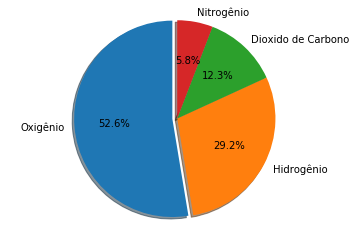

In [63]:
import matplotlib.pyplot as plt

explode = (0.05, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [61]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Experimente usar o atributo `hole` na construção do [gráfico de pizza usando plotly](https://plot.ly/python/pie-charts/).

## Gráfico de Barras

https://plot.ly/python/bar-charts/

## Gráfico de bolhas

https://plot.ly/python/bubble-charts/

## Gráfico de Gantt

https://plot.ly/python/gantt/


## Candlestick

